# Logistic Regression in Predicting Cardio Vascular

## Logistic Regression

## The Dataset
[(Ulianova, 2019)](https://www.kaggle.com/datasets/bhadaneeraj/cardio-vascular-disease-detection/data)<br>

## Outline
- Cleaning and Exploratory Analysis.

    - Look at the context of the dataset
    - Investigate its features and target class
    - Remove unwanted data
    - Visualize the data to gain further insights

- Model Building and Training

    - Scale and Split data
    - Build Sigmoid and Loss Functions 
    - Fit the Model 
    - Make Predicitons
    - Build default Scikit-Learn Logistic Regression model

- Evaluation

    - Accuracy
    - Precision
    - Recall
    - F1 Score
    - ROC and AUC
- Possible imporvements/Ideal Model
- Conclusion

# Code

### Downloads and Imports

In [89]:
# !kaggle datasets download -d bhadaneeraj/cardio-vascular-disease-detection

In [90]:
# !unzip cardio-vascular-disease-detection.zip

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score,auc,roc_curve,roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sys
import re
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style(style='white')
sns.set(rc={'figure.figsize':(12,8)})
plt.rcParams['figure.figsize']=(12,8)

In [92]:
df=pd.read_csv("cardio_train.csv")

## Cleaning and EDA

normal features and datatypes
clean, remove duplicates or null rows 
discover the classes
look at distribution
understand the idiocycracies 
may_batche look at the correlation between the features and class, heatmap 

In [93]:
print(df.shape)
df.head()

(69301, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


The above shows the dataset as a dataset with 69301 records with 12 features and a target class which is cardio. Before going into the meaning of each feature, it is important to clean the dataset first. 

In [94]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

from the above is it is clear that there is no missing values or records in dataset 

In [95]:
df.nunique()

id             69301
age             8069
gender             2
height           108
weight           285
ap_hi            153
ap_lo            157
cholesterol        3
gluc               3
smoke              2
alco               2
active             2
cardio             2
dtype: int64

from the above it is clear that the id feature is more of an idex column and is not needed in the analysis, therefore it is acceptable to drop it from the dataset. It is also clear which of the which of the features are categorical but that will be discussed later

In [96]:
df=df.drop(columns='id',axis=1)

In [97]:
df.duplicated().sum()

24

there are 24 records that are duplicated in the dataset and therefore they can be dropped from the dataset 

In [98]:
df=df.drop_duplicates()

In [99]:
df.shape

(69277, 12)

In [100]:
df.nunique()

age            8069
gender            2
height          108
weight          285
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69277 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69277 non-null  int64  
 1   gender       69277 non-null  int64  
 2   height       69277 non-null  int64  
 3   weight       69277 non-null  float64
 4   ap_hi        69277 non-null  int64  
 5   ap_lo        69277 non-null  int64  
 6   cholesterol  69277 non-null  int64  
 7   gluc         69277 non-null  int64  
 8   smoke        69277 non-null  int64  
 9   alco         69277 non-null  int64  
 10  active       69277 non-null  int64  
 11  cardio       69277 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


from the above it can be seen that the following columns are categorical: 
- Gender:1: Female 2:Male 
- cholesterol:1: normal, 2: above normal, 3: well above normal 
- gluc:1: normal, 2: above normal, 3: well above normal
- smoke: 0: Yes 1:No binary 
- alco: 0: Yes 1:No Binary 
- active: 0: Yes 1:No Binary
- cardio: 0: Yes 1:No Binary 
<br><br>
and the following are discrete: 

- age: int that is measured in days 
- height: measured in cm
- weight: measured in kg
- ap_hi :Systolic blood pressure ;Systolic blood pressure measures the force of blood against artery walls when the heart beats and pumps blood.         
- ap_lo :Diastolic blood pressure  ;Diastolic blood pressure measures the pressure in the arteries when the heart is at rest between beats.      


In [102]:
def age(x):
    return x//365
catdf=df.copy()
catdf['gender'].replace([1,2],['Female', 'Male'],inplace=True)
catdf['age']=catdf['age'].apply(age)
catdf['cholesterol'].replace([1,2,3],['normal',  'above normal',  'well above normal'],inplace=True)
catdf['gluc'].replace([1,2,3],['normal',  'above normal',  'well above normal'],inplace=True)
catdf['smoke'].replace([0,1],['Smoker','Non-Smoker'],inplace=True)
catdf['alco'].replace([0,1],['Alcohol','No Alcohol'],inplace=True)
catdf['active'].replace([0,1],['Active','Not Active'],inplace=True)
catdf['cardio'].replace([0,1],['Negative','Positive'],inplace=True)

the above code is used to make a copy of the dataset and replace the dummy variables with the category text in order to understand better and will only be used temporarily for graphs and visualizations

In [103]:
catdf.describe()

,age,height,weight,ap_hi,ap_lo
count,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000
mean,52.840885,164.362140,74.205884,128.832787,96.656004
std,6.767018,8.206439,14.384935,154.802512,189.128722
min,29.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,64.000000,250.000000,200.000000,16020.000000,11000.000000


The mean age of the patients is approximately 53 years, indicating that the dataset primarily represents middle-aged individuals. The average height is around 164 cm, while the average weight is about 74 kg, both of which are fairly typical values, but with noticeable variability as shown by the standard deviations. Systolic blood pressure (ap_hi), with an average of 128 (120), is on the higher end of the normal range, potentially indicating a risk for hypertension in many patients. Similarly, the diastolic blood pressure (ap_lo) has an average of 96 , which is elevated compared to normal values(80), meaaning that many patients in this dataset may be experiencing high blood pressure.

Text(0.5, 1.0, 'distribution of Classes')

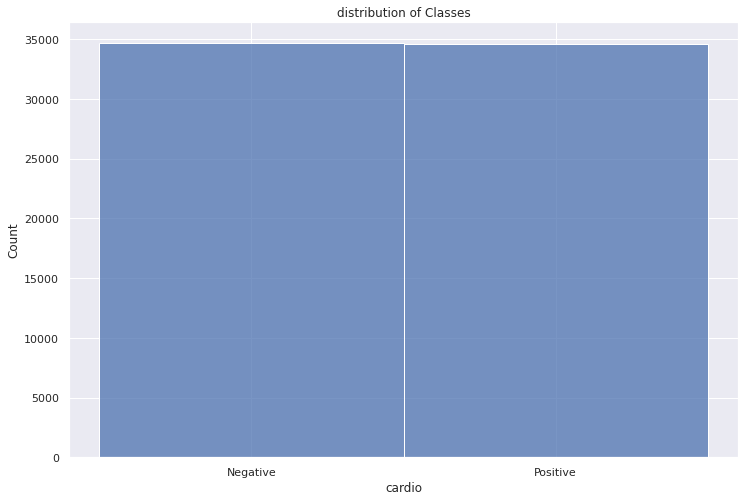

In [104]:
g=sns.histplot(catdf['cardio'])
plt.title('distribution of Classes')

from the above graph there is an almost perfect balance of the the classes, showcasing that there is no need to alter dataset in regards to class balance.

In [105]:
# sns.pairplot(catdf,hue='cardio')


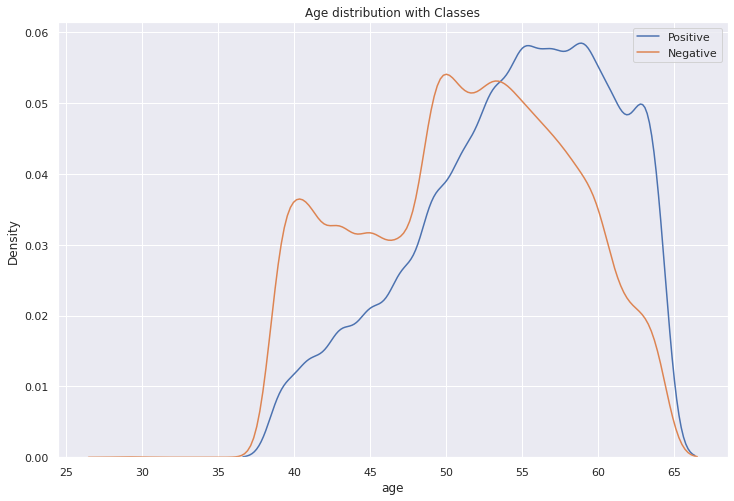

In [106]:
sns.kdeplot( catdf['age'].where(catdf.cardio=='Positive'),label='Positive')
sns.kdeplot( catdf['age'].where(catdf.cardio=='Negative'),label='Negative')
plt.title('Age distribution with Classes')
plt.legend()

The graph reveals a clear trend: as age increases, the peak for individuals without cardiovascular disease decreases, while the peak for those with the disease increases. This direct association between age and cardiovascular disease aligns with common knowledge, as younger people are less likely to develop such conditions compared to older individuals

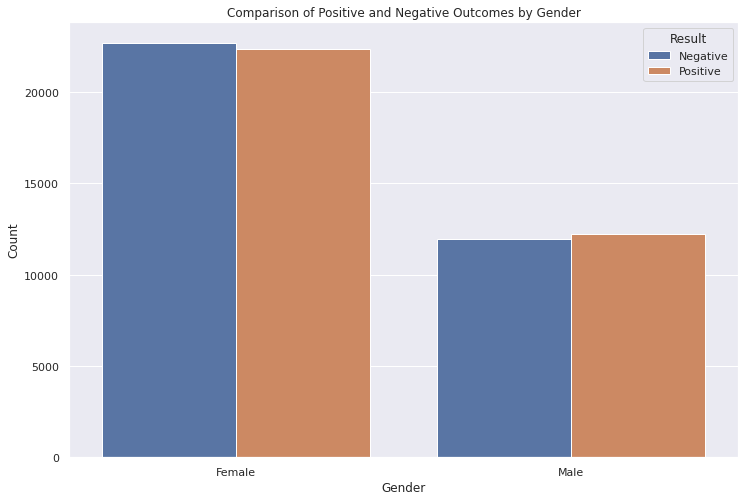

In [107]:

sns.countplot(x='gender', hue='cardio', data=catdf)
plt.title('Comparison of Positive and Negative Outcomes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Result', labels=['Negative', 'Positive'])


It's apparent that the dataset exhibits gender bias, with approximately 2/3 of the individuals being female and only 1/3 being male. This bias towards females may lead to a skewed representation of cardiovascular disease information, favoring insights into female health over male health. Such internal bias in the data could potentially result in biased model outcomes in terms of gender.

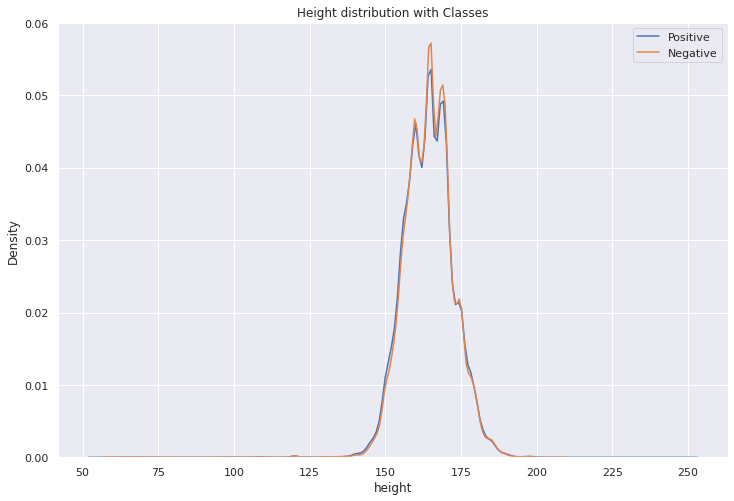

In [108]:
sns.kdeplot( catdf['height'].where(catdf.cardio=='Positive'),label='Positive')
sns.kdeplot( catdf['height'].where(catdf.cardio=='Negative'),label='Negative')
plt.title('Height distribution with Classes')
plt.legend()

 Interestingly, there seems to be no significant difference in the overall distribution between the two groups. This aligns with the understanding that height alone may not directly influence cardiovascular disease risk

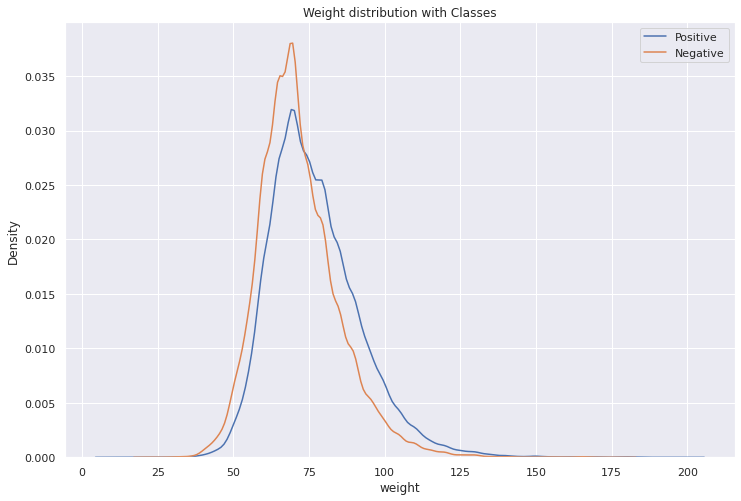

In [109]:
sns.kdeplot( catdf['weight'].where(catdf.cardio=='Positive'),label='Positive')
sns.kdeplot( catdf['weight'].where(catdf.cardio=='Negative'),label='Negative')
plt.title('Weight distribution with Classes')
plt.legend()

The distribution of weights bears some similarity to that of heights, especially when considering their probability distribution. However, a notable difference emerges in the weight distribution. Unlike with height, there is a slight distinction between individuals with and without cardiovascular disease. Those with lower weight tend to have a lower risk or are less likely to have cardiovascular disease, while individuals with higher weight are more likely to have cardiovascular disease.

<AxesSubplot:>

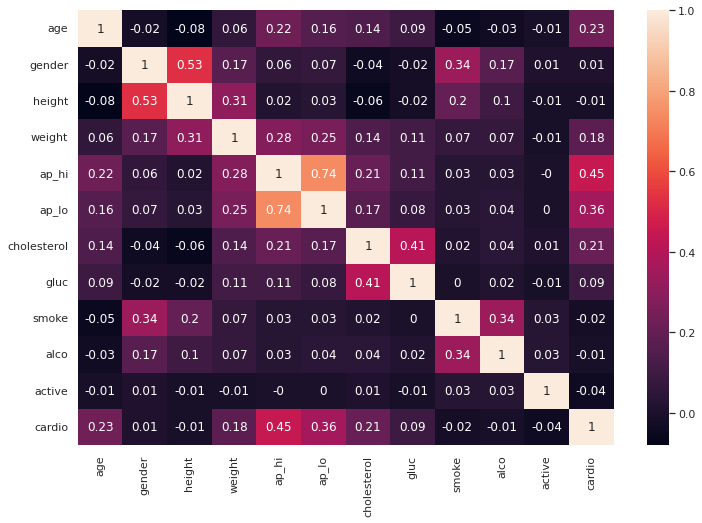

In [110]:
corr = round(df.corr(method="spearman"), 2)
sns.heatmap(corr, annot=True)

From the above heatmap it is evident that the most impacting features that contribute to cardiovascular disease are: age, blood pressure  and cholesterol. with Systolic blood pressure being the most impactful in a linear relationship. Whilst it is typically thought of that height and weight are major contributing factors to CVD, according to this dataset they have an almost negilegiible impact on CVD. 

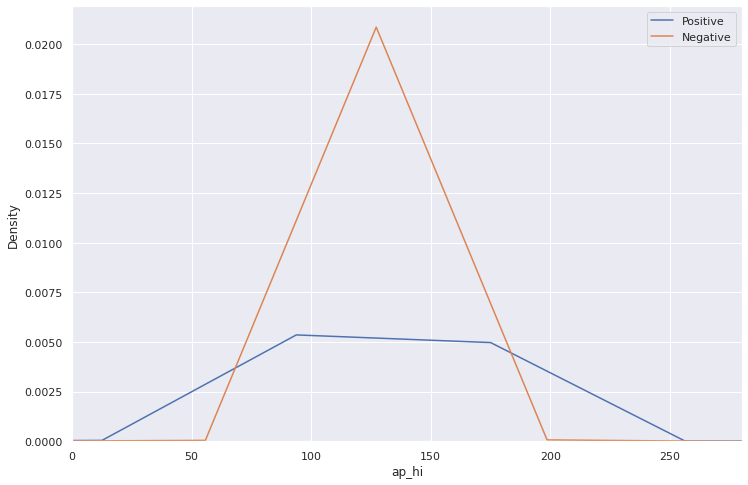

In [111]:
sns.kdeplot( catdf['ap_hi'].where(catdf.cardio=='Positive'),label='Positive',cut=0,)
sns.kdeplot( catdf['ap_hi'].where(catdf.cardio=='Negative'),label='Negative')

plt.xlim((0,280))
plt.legend()

## Model Building

First step is the scale the data to ensure when applying the sigmoid function that it is accuratce, the reason for splitting the data is to have a set of data that can be used to test the model on completely unseen data and thereby properly gauge its performance to generalise to new data.

In [112]:
scaler=StandardScaler()
y=df['cardio'].to_numpy()
X=df.drop(columns='cardio',axis=1)
X=scaler.fit_transform(X)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=54)

In [113]:
X_train.shape

(51957, 11)

### Logistic Regression

The following code is the creation of the sigmoid function which is what will be used to determine the probability of which class the datapoint belongs to.<br>
The loss function is used to determine the error according  to the difference between predicted probabilities with the implementation of epsilon to help to ensure numerical stability in the loss function by avoiding the calculation of log(0) and preventing NaN errors during training. This helps maintain consistent and smooth gradient descent updates.<br>
The gradient fucntion computes the gradients of the weights (dw) and bias (db) with respect to the loss function which returns how much each parameter needs to be updated to reduce the loss.


In [114]:
def sigmoid(X,weights):
    return 1.0/(1+np.exp(-z))

def loss( y,h):
    epsilon = 1e-9
    loss = -np.mean((y * np.log(h + epsilon)) + ((1-y) * np.log(1 - h+ epsilon)))
    return loss

def gradients(X, y, h):
    m = X.shape[0]
    dw = (1/m)*np.dot(X.T, (h - y))
    db = (1/m)*np.sum((h- y))

    return dw, db

the following method involves the use of Mini-batch decent to update the bias and wieghts based on the each batch allowing for faster training which that minimize the loss function, which in turn improves the model's performance by making more accurate predictions.

In [115]:

def train(X, y, batches, epochs, lr):

    m, n = X.shape
    weights = np.zeros((n,1))
    bias = 0
    y = y.reshape(m,1)
    losses = []

    for epoch in range(epochs):
        for i in range((m-1)//batches + 1):

            start = i*batches
            end = start + batches
            x_batch = X[start:end]
            y_batch = y[start:end]

            h = sigmoid(np.dot(x_batch, weights) + bias)

            dw, db = gradients(x_batch, y_batch, h)

            weights -= lr*dw
            bias -= lr*db

        l = loss(y, sigmoid(np.dot(X, weights) + bias))
        losses.append(l)

    return weights, bias, losses

def predict(X,w,b):
    pred = sigmoid(np.dot(X, w) + b)
    ypred = [1 if i > 0.5 else 0 for i in pred]
    return np.array(ypred)  

the predict function uses the final weights and bias to make predictions. If the sigmoid output is greater than 0.5, it predicts 1, otherwise 0. it is then trained and the weights, biases and losses are returned

In [116]:
w,b, l = train(X_train, y_train, batches=100, epochs=800, lr=0.01)


In [117]:
ypred=predict(X_test,w,b)

### Sci-Kit Learn Logistic Regression

The below code is a standard Sci-kit learn logistic regression model that will be used as a baseline to compare the the LGS logistic model in determining its overall performance

In [118]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ypredL = logreg.predict(X_test)

## Evaluation

for the sake of readability and brevity the created logistic regression model will be referred to as LGS(logistic regression from scratch) and the Sci-kit Learn model will be referred to as SKLG(Sci-kit Logistic regression)

### Training Loss

Text(0.5, 1.0, 'Loss vs Epochs')

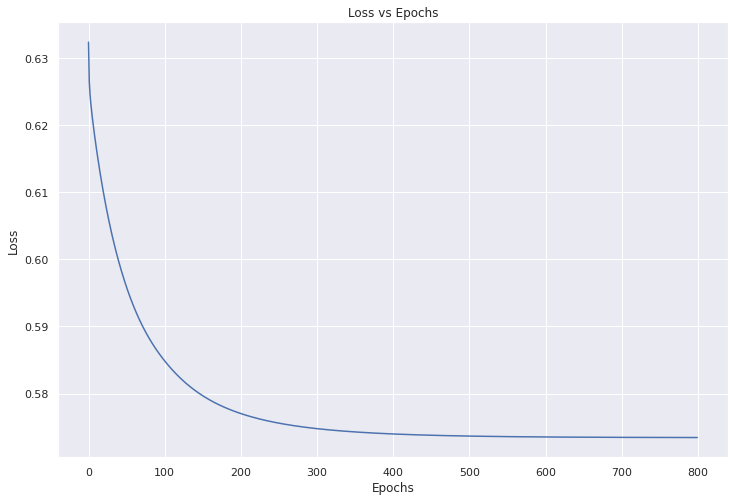

In [119]:
plt.plot(range(800), l)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')

When it comes to loss in a model the closer to 0 the loss is, the better the model performs. Therefore when regarding the chart the following can be said: 
In the first 200 epochs, the loss decreases quickly. This shows that the model is learning rapidly during the early stages of training, and the gradients are driving significant updates to the weights and bias, improving the model's predictions.
Slowing of Loss Reduction: After about 400 epochs, the rate of loss reduction slows down, which is a sign that the model is approaching a good fit to the data. The gradient steps become smaller as the loss approaches a minimum. By around 600–800 epochs, the loss seems to have plateaued. This indicates that the model has reached a stable point where further training yields minimal improvement. The model may have reached or is very close to the optimal weights and bias

### Confusion Matrix
A confusion matrix is a table used to evaluate the performance of a classification model. It allows you to visualize the performance of an algorithm by comparing the actual (true) labels with the predicted labels made by the model (Delovski, 2023). The matrix provides a detailed breakdown of the model's correct and incorrect predictions, helping you understand where the model is making errors.

Confusion Matrix for the LGS Model


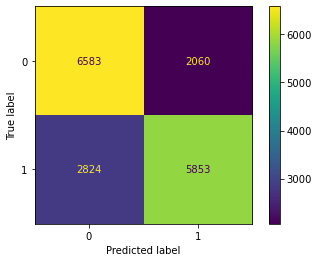

In [120]:
sns.reset_orig() 
print('Confusion Matrix for the LGS Model')
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, ypred))
cm.plot()

Confusion Matrix for the SKLG Model


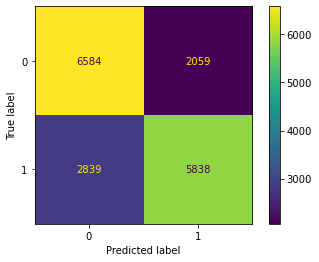

In [121]:
print('Confusion Matrix for the SKLG Model')
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, ypredL))
cm.plot()

The difference between the two models is the false negatives are the SKLG model missclassified more of the 0 class,with 2839 compared to the LGS model of 2825, the difference of 14 may not seem like alot more to keep in mind that these are false negatives meaning a patient with CVD was classified as normal which could lead to deadly consequences therefore it is imperative to ensure there is minimal type 2 errors.

### Accuracy
Accuracy is the measure of how correct classifier is, as it takes the total number of correct predictions and divides it by the total number of predictions made (Agrawal, 2024). It allows for a general understanding of the ratio of correct predictions in the overall predictions. While this is a good indication of the model's performance accuracy does not take into account the false positive and false negatives. Accuracy is a good measure when the target is well balanced, as this would result in equal opportunities to make make true or false predictions equally thereby allowing a proper gauge at the model's accuracy (Wohlwend, 2023).

In [122]:
print(f' The Accuracy for the LGS model is :{accuracy_score(y_test,ypred)}')
print(f' The Accuracy for the SKLG model is :{accuracy_score(y_test,ypredL)}')

 The Accuracy for the LGS model is :0.7180138568129331
 The Accuracy for the SKLG model is :0.7172055427251732


The above shows that the LGS model correctly identified more of the data correctly then compared to the SKLG model with 71.801 vs 71.720. This is is most likely becuase the SKLG model by default implements l2 regulaization therefore there are certain intracies of the data that were not deemed important to train on thus resulting in the 13 missclassification (12FN, 1FP) in the SKLG model when compared to the LGS model. 

### Precision
Precision is the measure of how positively correct a classifier is as it is the number of true positives divided by the sum of true and false positives. Precision expresses the proportion of data correctly predicted as positive (Delovski, 2023). Using it as a metric, you can define the percent of the predicted class inside the data you classified as that class (Wohlwend, 2023). In other words, precision helps you measure how often the model correctly predicted that a data point belongs to the class the model assigned to it. Precision is particularly useful in situations where the class distribution is imbalanced.  However Precision in important when in situations where false positives are costly or undesirable (Wohlwend, 2023).  In the context of this dataset precision is not of critical concern as flagging a patiens as that is normal as CVD would not lead any loss of life compared to classifying someone as normal when they have CVD as this could result in the loss of life.

In [123]:
print(f' The Precision for the LGS model is :{precision_score(y_test,ypred)}')
print(f' The Precision for the SK model is :{precision_score(y_test,ypredL)}')

 The Precision for the LGS model is :0.7396688992796664
 The Precision for the SK model is :0.739268076484741


The above shwows that the LGS model correctly identified more correct cases  compared to the SKLG model with 73.966 vs 73.926. The difference between the two models is in a sense negligble as it was a single data point that was missclassified in the precision metric, which is likely the result of the regularization applied in the SKLG model.

### Recall
Recall is a measure of the true positives cases in all correctly predicted cases in the model(Agrawal, 2024). Recall is defined as the number of true positives divided by the sum of true positives and false negatives (Delovski, 2023). It expresses the ability to find all relevant instances in a dataset. Recall measures how good your model is at correctly predicting positive cases. Recall is a useful metric in cases where False Negative is of higher concern than False Positive. In the context of the dataset a False Negative is of a higher value as predicting a patient as normal when they actually have CVD would lead to dire consequences and possible loss of life as they would go untreated.

In [124]:
print(f' The Recall for the LGS model is :{recall_score(y_test,ypred)}')
print(f' The Recall for the SK model is :{recall_score(y_test,ypredL)}')

 The Recall for the LGS model is :0.6745418923591103
 The Recall for the SK model is :0.6728131842802813


The above shows that the LGS model correctly identified more of the positive cases  compared to the SKLG model with 67.454 vs 67.281. The difference between the two models is 12 datapoints missclassified in the recall metric, which is likely the result of the regularization applied in the SKLG model as both models dont have the best scores in terms of recall which is agurable the most important metric in regard to the dataset. therefore it can be said that either more steps should be taken to tune the models in order to improve this score better. 

### F1-Score
The F1 score is a metric that combines both Precision and Recall which provides a balance between Precision and Recall and can be a better measure than Accuracy since this dataset is unbalanced (Wohlwend, 2023) . F1 score is the harmonic mean of Precision and Recall. The harmonic mean is a type of average that is used when you want to give more importance to smaller numbers. It is different from the regular (arithmetic) mean, which simply adds up all the numbers and divides by the count (Bromberg, 2023). A high F1 score is a good indicator that the model performed well because to achieve a high score both precision and recall need to be high.


In [125]:
print(f' The F1 Score for the LGS model is :{f1_score(y_test,ypred)}')
print(f' The F1 Score for the SK model is :{f1_score(y_test,ypredL)}')

 The F1 Score for the LGS model is :0.7056057866184449
 The F1 Score for the SK model is :0.7044768915168337


Since the LGS model had a higher precsision and recall, it only makes sense for it to have the higher f1-score when compared to the SKLG model, 70.560 vs 70.447.

### ROC Receiver-operating characteristic curve and AUC Area under the curve
A Receiver-operating characteristic curve (ROC) is used for classification problems in which the True positive rate (Recall) and False positive rate are ploted on a graph, across various threshold settings, illustrating how well the model distinguishes between positive and negative classes (Bhandari, 2024). The ROC curve provides insights into the trade-offs between sensitivity (true positive rate) and the false positive rate as the classification threshold changes (Bhandari,2024).

The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve (Bhandari,2024). AUC value ranges from 0 to 1, where a higher AUC indicates a better-performing model. An AUC of 1 signifies perfect classification, while an AUC of 0.5 suggests random guessing (Bhandari,2024).The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes. The ROC curve and AUC are particularly useful in scenarios with class imbalance, as they evaluate the model's performance independent of the threshold and provide a comprehensive measure of its discriminatory power.

In [126]:
print(f' The ROC for the LGS model is :{roc_auc_score(y_test,ypred)}')
print(f' The ROC for the SK model is :{roc_auc_score(y_test,ypredL)}')

 The ROC for the LGS model is :0.7180993622387938
 The ROC for the SK model is :0.7172928584828457


Since we know that this is a binary classifier and that the LGS model had 13 more datapoints correctly classified and distinguished than the SKLG model is only fair to say that it would have the higher roc-auc score with 71.809 vs 71.729.

Summary comparison:

In [127]:
ac=accuracy_score(y_test,ypred)-accuracy_score(y_test,ypredL)
pr=precision_score(y_test,ypred)-precision_score(y_test,ypredL)
re=recall_score(y_test,ypred)-recall_score(y_test,ypredL)
f1=f1_score(y_test,ypred)-f1_score(y_test,ypredL)
ra=roc_auc_score(y_test,ypred)-roc_auc_score(y_test,ypredL)
print(f'The difference between the LGS model and the SKLG model on accuracy is:{ac}')
print(f'The difference between the LGS model and the SKLG model on precision is:{pr}')
print(f'The difference between the LGS model and the SKLG model on recall is:{re}')
print(f'The difference between the LGS model and the SKLG model on f1-score is:{f1}')
print(f'The difference between the LGS model and the SKLG model on roc-auc is:{ra}')

The difference between the LGS model and the SKLG model on accuracy is:0.0008083140877598316
The difference between the LGS model and the SKLG model on precision is:0.00040082279492537065
The difference between the LGS model and the SKLG model on recall is:0.0017287080788290776
The difference between the LGS model and the SKLG model on f1-score is:0.0011288951016111826
The difference between the LGS model and the SKLG model on roc-auc is:0.0008065037559480404


in all areas the LGS model performed better than the SKLG model when tested on new unseen data, however one area that attention should be drawn too is the difference in recall scores as this difference was the highest in comparision to the difference of the other scores, meaning that in the context of the dataset the LGS model is more ideal as discussed earlier, recall is the more important metric as a false negative would lead to untreated patients and possible loss of life.

## Possible Improvements 

From the above evaluations, it can be said that the LGS models perfromed objectively better as it had better scores in all metrics, however is it worth menitioning that the differences between the the models evalutation metrics were than <0.01 which can be considered an almost neglegible amount. this difference in scores can be attributed to the fact that the SKLG employs L2 regularization and therefore certain obserations were most likley removed during training or thier importance reduced thereby the SKLG model was not able to retain the intracies needed to properlly classify the 13 records it misclassified compared to the LGS model which did not employ any regularization.

However whilst this is true there are more steps that can be taken to better improve both models which may lead to better results and possibly more differentiating results that can more easily define a better model. As since the scores are so close the models similar. It is worth noting that the actual scores of these models were not ideal, especially the recall score which can be argued to be the most important score, which for both models was 67~, this is not ideal when dealing with a dataset in which the classification of false negatives(a CVD patient classified as normal) can lead ot mistreatment and possible loss of life. 


Thereby a possible way in which both models could be improved is by further tuning the hyper parameters and experimenting with different train/test ratios in order to determine the optimal ratio for this data and model. It is also worth noting there was a definite imbalance in the data in regards to gender which may have led to skewed outcomes and ressults, thereby a future precaution should be taken in which the dataset if sampled to ensure equal distibution in both the target variable and gender feature. It should also be considered that it is possible that this dataset is weak in regard to logistic regression.


## Conclusion

In conclusion the LGS model was able to perform slightly better at classifing the data for the context as evident by the recall score when compared to that of the SKLG model.
However to get the full scope of these models they should be properly hypertuned in order to fully understand thier strengths and weaknesses.

# References

Agrawal, S.K., 2024. Metrics to Evaluate your Classification Model to take the right decisions. [Online] <br>
Available at: https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/<br>
[Accessed 10 October 2024]<br><br>


Bhandari, A. 2024. Guide to AUC ROC Curve in Machine Learning : What Is Specificity?.[Online].<br>Available at:https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/  <br> [Accessed 30 August 2024] <br><br>
Bromberg, M., 2024. Harmonic Mean Definition, Formula, and Examples. [Online] <br>
Available at:https://www.investopedia.com/terms/h/harmonicaverage.asp<br>
[Accessed 10 October2024]<br><br>

Delovskli, B., 2023. How to Evaluate Classification Models. [Online] <br>
Available at: https://www.edlitera.com/en/blog/posts/evaluating-classification-models<br>
[Accessed 10 October 2024]<br><br>

Ulianova, S. 2019.Cardiovascular Disease Detection.[Online]<br>
Available at:https://www.kaggle.com/datasets/bhadaneeraj/cardio-vascular-disease-detection/data <br>
[Accessed 10 October2024]<br><br>

